<a href="https://colab.research.google.com/github/Boso123/MLcourseFatiga/blob/master/NoSupervisado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline
from copy import deepcopy
import numpy as np
import pandas as pd
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min, silhouette_score, completeness_score

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [0]:
data = pd.read_csv('/content/drive/My Drive/MicrosuenosData/data.csv')
print(data.shape)
data.head()

(9120, 10)


,id,image,time,initial_time,pitch,yaw,roll,pitchs,yawns,tag
0,1,/images/image1.jpg,2020-01-22T17:22:08.135000,2020-01-22T17:22:07.443000,10.746500,-33.467357,-3.569197,0,42,untagged
1,2,/images/image2.jpg,2020-01-22T17:22:08.367000,2020-01-22T17:22:07.443000,12.180362,-34.306218,-4.846204,0,42,untagged
2,3,/images/image3.jpg,2020-01-22T17:22:08.599000,2020-01-22T17:22:07.443000,11.764933,-32.793980,-4.018201,0,42,untagged
3,4,/images/image4.jpg,2020-01-22T17:22:07.443000,2020-01-22T17:22:07.443000,15.753147,-29.482020,-5.783584,0,42,untagged
4,5,/images/image5.jpg,2020-01-22T17:22:07.672000,2020-01-22T17:22:07.443000,15.288966,-29.170070,-2.748542,0,42,untagged


In [0]:
data.set_index('id')

,image,time,initial_time,pitch,yaw,roll,pitchs,yawns,tag
id,,,,,,,,,
1,/images/image1.jpg,2020-01-22T17:22:08.135000,2020-01-22T17:22:07.443000,10.746500,-33.467357,-3.569197,0,42,untagged
2,/images/image2.jpg,2020-01-22T17:22:08.367000,2020-01-22T17:22:07.443000,12.180362,-34.306218,-4.846204,0,42,untagged
3,/images/image3.jpg,2020-01-22T17:22:08.599000,2020-01-22T17:22:07.443000,11.764933,-32.793980,-4.018201,0,42,untagged
4,/images/image4.jpg,2020-01-22T17:22:07.443000,2020-01-22T17:22:07.443000,15.753147,-29.482020,-5.783584,0,42,untagged
5,/images/image5.jpg,2020-01-22T17:22:07.672000,2020-01-22T17:22:07.443000,15.288966,-29.170070,-2.748542,0,42,untagged
...,...,...,...,...,...,...,...,...,...
9116,/images/image9116.jpg,2019-08-09T19:55:05.103000,2019-08-09T19:55:04.834000,7.387698,-1.501343,0.584255,0,0,dormido
9117,/images/image9117.jpg,2019-08-09T19:55:05.158000,2019-08-09T19:55:04.834000,7.864752,1.119364,1.112421,0,0,dormido
9118,/images/image9118.jpg,2019-08-09T19:55:04.834000,2019-08-09T19:55:04.834000,7.457332,-0.092841,-0.468695,0,0,dormido


In [0]:
to_drop = ['pitchs', "image"]

data.drop(to_drop, inplace=True, axis=1)

In [0]:
data = data.replace('untagged', 0)
data = data.replace('dormido', 1)
data['initial_time'] = pd.to_datetime(data['initial_time']).astype(int) / 10**9
data.describe()

,id,initial_time,pitch,yaw,roll,yawns,tag
count,9120.000000,9.120000e+03,9120.000000,9120.000000,9120.000000,9120.000000,9120.000000
mean,4560.500000,1.577395e+09,20.021266,-26.296021,-7.484727,12.238816,0.236842
std,2632.861561,3.369303e+06,13.580649,23.710786,12.668202,14.363362,0.425168
min,1.000000,1.565381e+09,-25.995724,-67.263201,-178.874990,0.000000,0.000000
25%,2280.750000,1.577722e+09,12.712986,-44.984264,-14.023109,2.000000,0.000000
50%,4560.500000,1.578432e+09,19.684845,-31.091948,-8.519872,8.000000,0.000000
75%,6840.250000,1.579030e+09,26.443946,-14.156473,-2.655539,18.000000,0.000000
max,9120.000000,1.579714e+09,94.058592,61.573714,179.925438,98.000000,1.000000


In [0]:
print(data.groupby("tag").size())

tag
0    6960
1    2160
dtype: int64


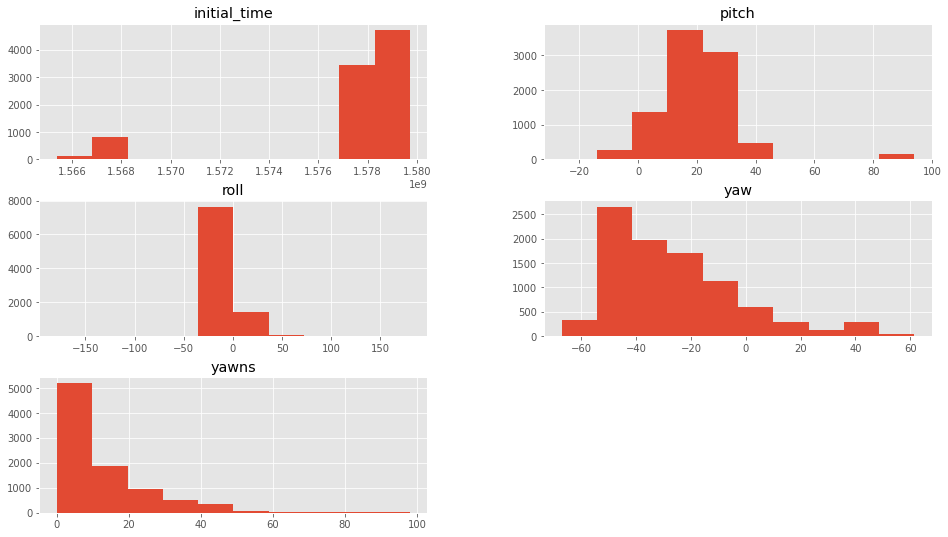

In [0]:
data.drop(['tag', 'id'], 1).hist()
plt.show()

In [0]:
print(data['initial_time'][0])
data.head()

1579713727.443


,id,time,initial_time,pitch,yaw,roll,yawns,tag
0,1,2020-01-22T17:22:08.135000,1.579714e+09,10.746500,-33.467357,-3.569197,42,0
1,2,2020-01-22T17:22:08.367000,1.579714e+09,12.180362,-34.306218,-4.846204,42,0
2,3,2020-01-22T17:22:08.599000,1.579714e+09,11.764933,-32.793980,-4.018201,42,0
3,4,2020-01-22T17:22:07.443000,1.579714e+09,15.753147,-29.482020,-5.783584,42,0
4,5,2020-01-22T17:22:07.672000,1.579714e+09,15.288966,-29.170070,-2.748542,42,0


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


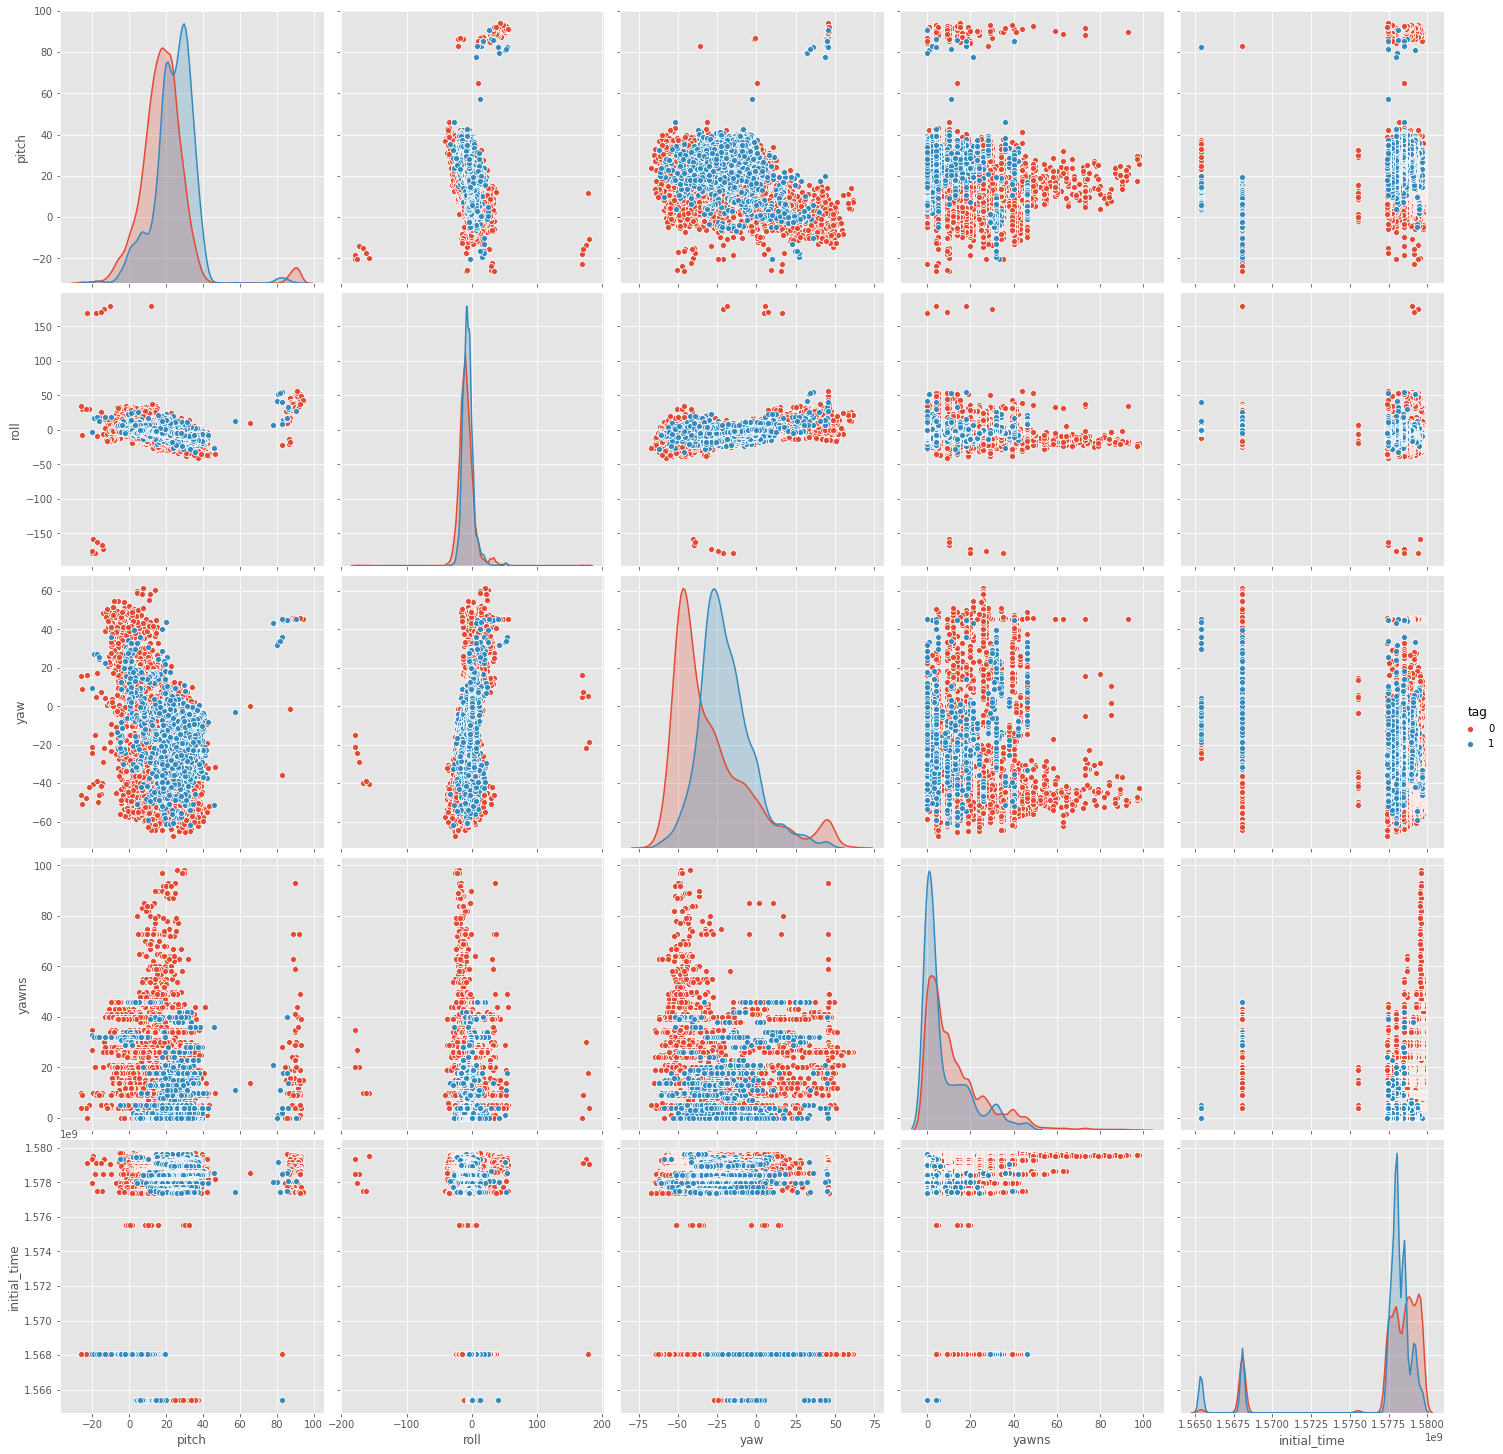

In [0]:
sb.pairplot(data.dropna(), hue='tag', size=4, vars=["pitch", "roll", "yaw", "yawns", "initial_time"], kind='scatter')

In [0]:
X = np.array(data[["pitch", "roll", "yaw", "yawns", "initial_time"]])
y = np.array(data['tag'])
X.shape

(9120, 5)

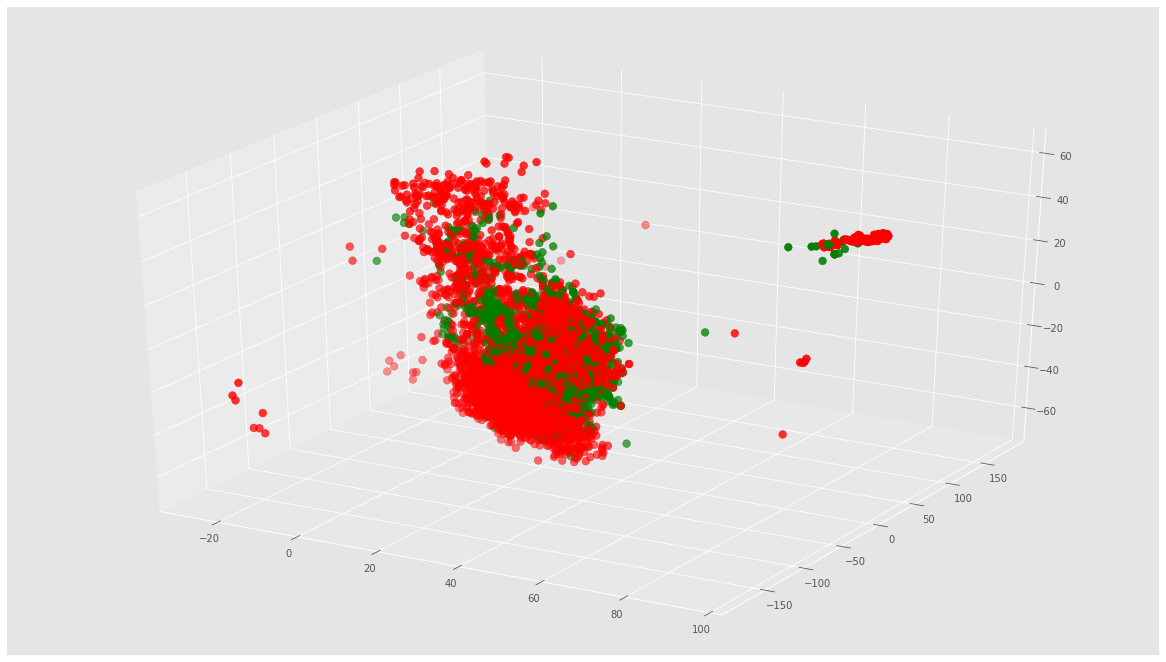

In [0]:
fig = plt.figure()
ax = Axes3D(fig)
colores = ['red', 'green']
asignar = []
for row in y:
  asignar.append(colores[row])
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar, s=60)

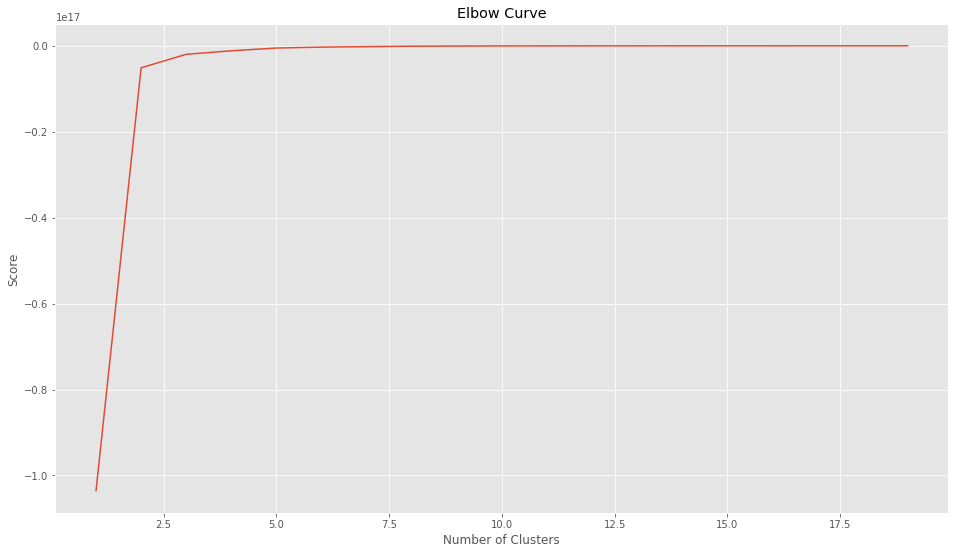

In [0]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title("Elbow Curve")
plt.show()

In [0]:
kmeans = KMeans(n_clusters=2).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[ 2.19168522e+01 -8.86258595e+00 -3.02102605e+01  1.06944037e+01
   1.57850587e+09]
 [ 3.44703849e+00  4.56270622e+00  7.92848018e+00  2.57425214e+01
   1.56768264e+09]]


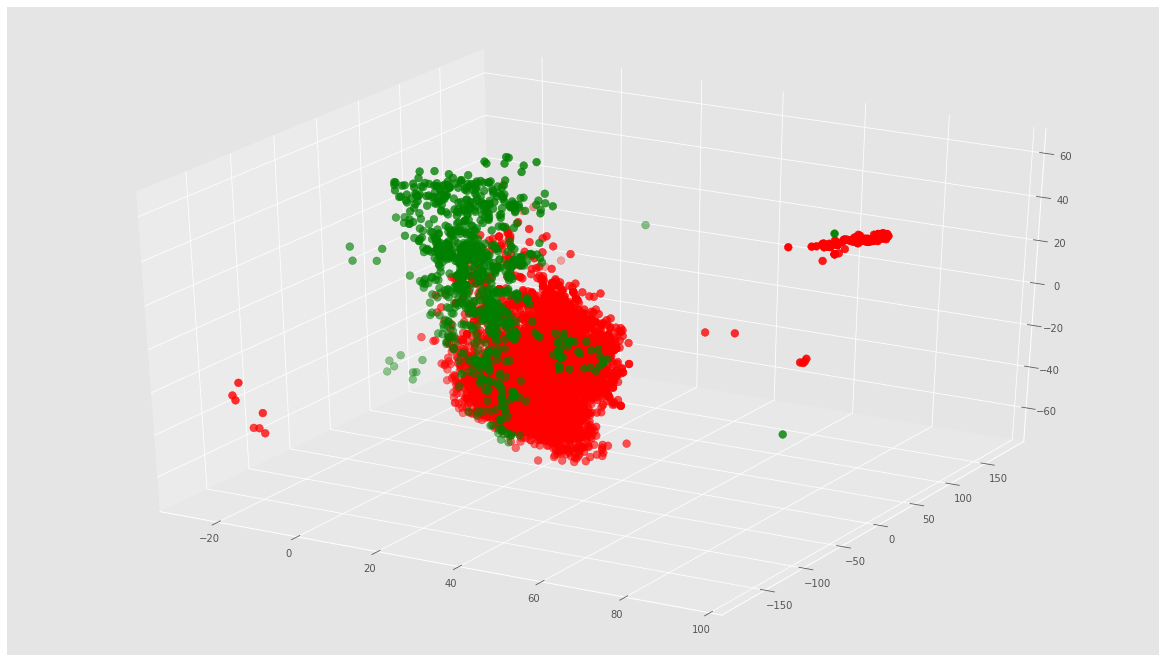

In [0]:
labels = kmeans.predict(X)
C = kmeans.cluster_centers_
colores=['red', 'green']
asignar=[]
for row in labels:
  asignar.append(colores[row])
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar, s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', s=1000)

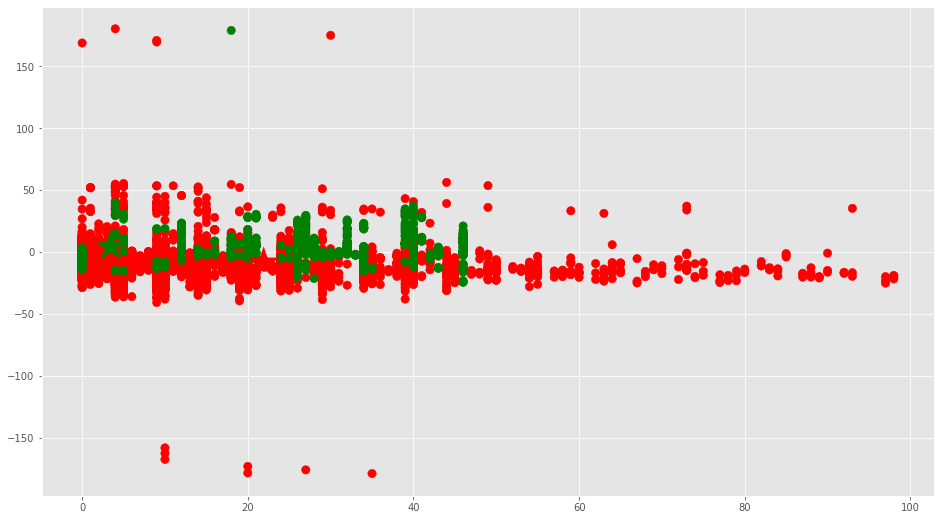

In [0]:
f1 = data['yawns'].values
f2 = data['roll'].values

plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

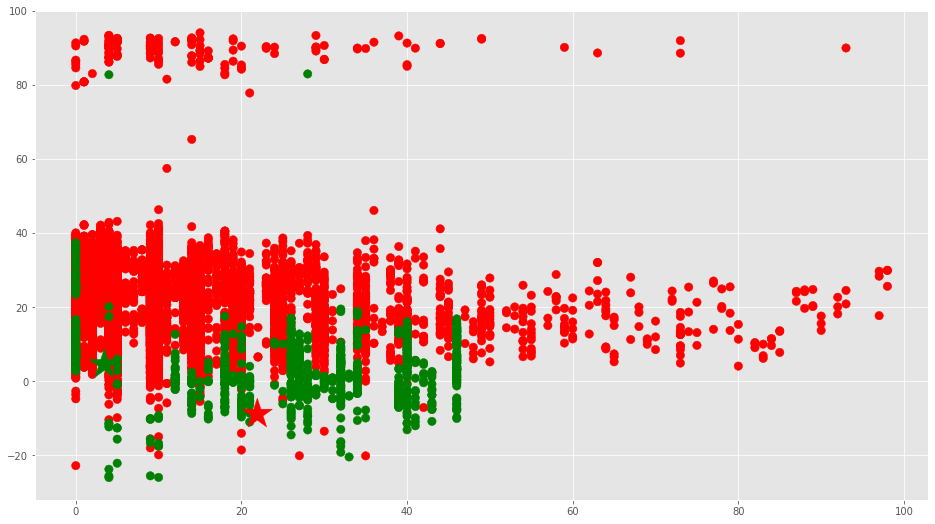

In [0]:
f1 = data['yawns'].values
f2 = data['pitch'].values

plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

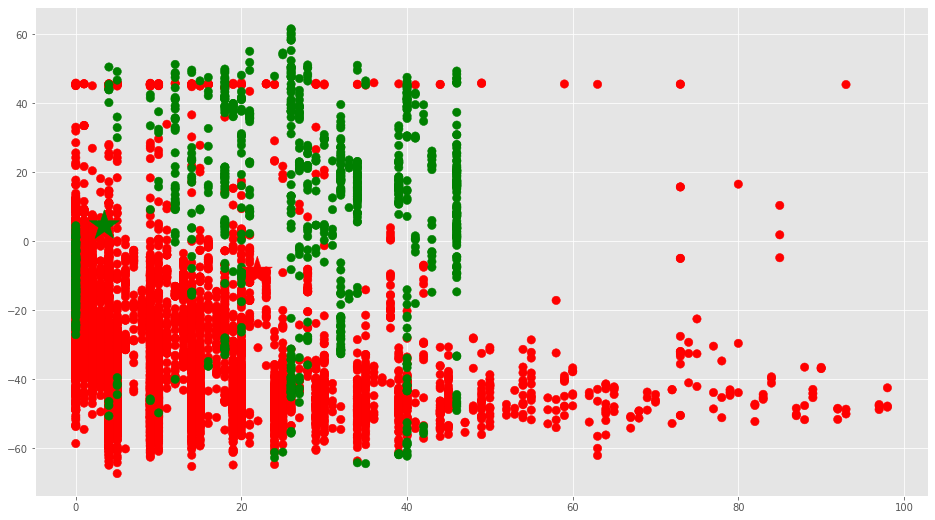

In [0]:
f1 = data['yawns'].values
f2 = data['yaw'].values

plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

In [0]:
copy = pd.DataFrame()
copy['id']=data['id'].values
copy['tag']=data['tag'].values
copy['label'] = labels
cantidadGrupo = pd.DataFrame()
cantidadGrupo['color']=colores
cantidadGrupo['cantidad']=copy.groupby('tag').size()
cantidadGrupo

,color,cantidad
0,red,6960
1,green,2160


In [0]:
group_referrer_index = copy['tag'] == 0
group_referrals = copy[group_referrer_index]

diversidadGrupo = pd.DataFrame()
diversidadGrupo['tag']=[0,1]
diversidadGrupo['cantidad']=group_referrals.groupby('tag').size()
diversidadGrupo

,tag,cantidad
0,0,6960.0
1,1,NaN


In [0]:
closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, X)
closest

array([4184, 8985])

In [0]:
for register in closest:
  print(data['id'][register])

4185
8986


In [0]:
kmeans.cluster_centers_

array([[ 2.19168522e+01, -8.86258595e+00, -3.02102605e+01,
         1.06944037e+01,  1.57850587e+09],
       [ 3.44703849e+00,  4.56270622e+00,  7.92848018e+00,
         2.57425214e+01,  1.56768264e+09]])

In [0]:
silhouette_score(X, kmeans.labels_, metric='euclidean')

0.9252066238333951